In [13]:
# 0417 002

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

source_A Failed authentication!
source_B Failed authentication!


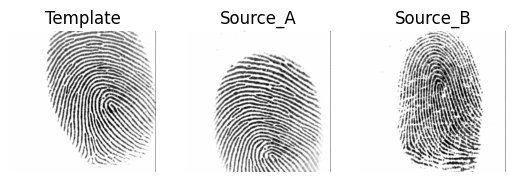

In [14]:
# Work 1

def sift_match(img_A, img_B):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img_A, None)
    kp2, des2 = sift.detectAndCompute(img_B, None)
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    if len(good_matches) > 500:
        return True
    else:
        return False

def main_1():
    img_template = cv.imread('./0417dataset/DB1_B/101_7.tif')
    img_A = cv.imread('./0417dataset/DB1_B/101_6.tif')
    img_B = cv.imread('./0417dataset/DB1_B/103_7.tif')
    if sift_match(img_template, img_A):
        print("source_A Successful authentication!")
    else:
        print("source_A Failed authentication!")
    if sift_match(img_template, img_B):
        print("source_B Successful authentication!")
    else:
        print("source_B Failed authentication!")

    plt.subplot(131)
    plt.imshow(img_template)
    plt.title('Template')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(img_A)
    plt.title('Source_A')
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(img_B)
    plt.title('Source_B')
    plt.axis('off')

main_1()

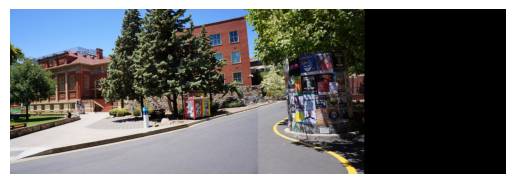

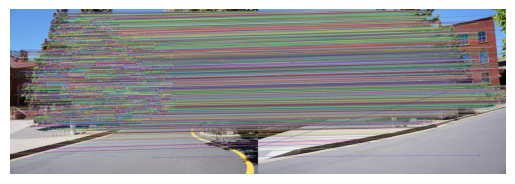

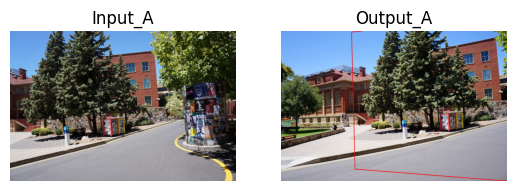

In [27]:
# Work 2

# 拼接有重叠区域图像
def stitch(img_A, img_B):
    
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img_A, None)
    kp2, des2 = sift.detectAndCompute(img_B, None)
    
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    
    M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    
    dst = cv.warpPerspective(img_A, M, (img_A.shape[1] + img_B.shape[1], img_A.shape[0]))
    dst[0:img_B.shape[0], 0:img_B.shape[1]] = img_B
    return dst, draw_matches(img_A, img_B, kp1, kp2, good_matches), draw_homography(img_A, img_B, kp1, kp2, good_matches)

# 绘制匹配点
def draw_matches(img_A, img_B, kp1, kp2, good_matches):
    img_A = cv.cvtColor(img_A, cv.COLOR_BGR2RGB)
    img_B = cv.cvtColor(img_B, cv.COLOR_BGR2RGB)
    img3 = cv.drawMatches(img_A, kp1, img_B, kp2, good_matches, None, flags=2)
    # plt.figure()
    # plt.imshow(img3)
    # plt.axis('off')
    # plt.show()
    return img3

# 绘制单应性转换图
def draw_homography(img_A, img_B, kp1, kp2, good_matches):
    img_A = cv.cvtColor(img_A, cv.COLOR_BGR2RGB)
    img_B = cv.cvtColor(img_B, cv.COLOR_BGR2RGB)
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    h, w = img_A.shape[:2]
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)
    img2 = cv.polylines(img_B, [np.int32(dst)], True, 255, 3, cv.LINE_AA)
    # plt.figure()
    # plt.subplot(121)
    # plt.imshow(img_A)
    # plt.title('Input_A')
    # plt.axis('off')
    # plt.subplot(122)
    # plt.imshow(img2)
    # plt.title('Output_A')
    # plt.axis('off')
    # plt.show()
    return img2

def main_2():
    img_A = cv.imread('./0417dataset/images/DSC02932.JPG')
    img_B = cv.imread('./0417dataset/images/DSC02931.JPG')
    dst, matches, img2 = stitch(img_A, img_B)
    plt.figure()
    plt.imshow(dst[:,:,::-1])
    plt.axis('off')

    plt.figure()
    plt.imshow(matches)
    plt.axis('off')

    plt.figure()
    plt.subplot(121)
    plt.imshow(img_A[:,:,::-1])
    plt.title('Input_A')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(img2)
    plt.title('Output_A')
    plt.axis('off')

main_2()